In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20, 10)
pd.options.mode.chained_assignment = None

<h2>Data Cleaning</h2>

In [4]:
df = pd.read_csv('dataset/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2.shape

(13246, 5)

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bedroom'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
df2['bedroom'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 19,
       27, 43], dtype=int64)

In [13]:
df2[df2.bedroom > 10]

,location,size,total_sqft,bath,price,bedroom
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [14]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_float)

In [19]:
df3['bath'].describe()

count    13246.000000
mean         2.692586
std          1.341506
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [20]:
df3['price'].describe()

count    13246.000000
mean       112.389392
std        149.076587
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [21]:
len(df3['price'].unique())

1955

<h2>Feature Engineering</h2>

In [22]:
df4 = df3.copy()
df4['price_per_sqft'] = round(df4['price']*100000 / df4['total_sqft'], 0)

In [23]:
df4.head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3700.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4306.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6246.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.0


In [24]:
len(df4['location'].unique())

1304

<h4>Dimension Reduction</h4>
Need to reduce dimensions. 1304 is large number for dimensions

In [25]:
df4['location'] == df4['location'].apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [26]:
len(location_stats[location_stats <= 10])

1063

In [27]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [28]:
df4['location'] = df4['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

len(df4['location'].unique())

242

<h4>Outliers Removal</h4>

In [29]:
df4[df4['total_sqft'] / df4['bedroom'] < 200]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36275.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.0
68,Other,8 Bedroom,1350.0,7.0,85.0,8,6296.0
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.0
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.0
...,...,...,...,...,...,...,...
13073,Nagarbhavi,4 Bedroom,600.0,3.0,100.0,4,16667.0
13112,Nagavara,3 Bedroom,440.0,3.0,35.0,3,7955.0
13198,Other,8 Bedroom,1200.0,8.0,140.0,8,11667.0
13221,Other,9 Bedroom,1178.0,9.0,75.0,9,6367.0


In [30]:
df5 = df4[~(df4['total_sqft'] / df4['bedroom'] < 200)]
df5.shape

(12906, 7)

In [31]:
df5['price_per_sqft'].describe()

count     12860.000000
mean       6496.715785
std        4344.791961
min         268.000000
25%        4240.000000
50%        5357.000000
75%        7094.250000
max      176471.000000
Name: price_per_sqft, dtype: float64

Remove Data where price per square feet has higher value than 1 std. deviation by location

In [32]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df6 = remove_pps_outliers(df5)
df6.describe()

,total_sqft,bath,price,bedroom,price_per_sqft
count,10656.000000,10656.000000,10656.000000,10656.000000,10656.000000
mean,1497.140701,2.505537,91.579626,2.609797,5750.380068
std,876.360137,1.055373,85.938096,0.980214,2397.868997
min,284.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,49.000000,2.000000,4250.750000
50%,1277.000000,2.000000,67.770000,2.000000,5204.500000
75%,1645.000000,3.000000,100.000000,3.000000,6526.250000
max,30400.000000,27.000000,2200.000000,27.000000,24510.000000


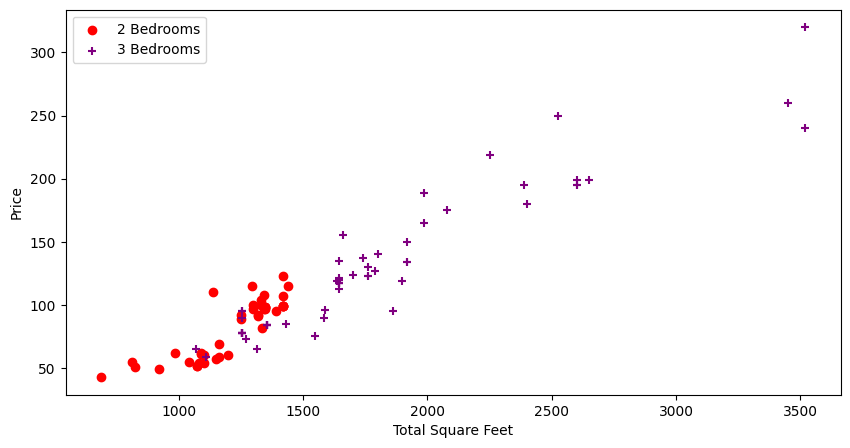

In [33]:
location = "Hebbal"
bedroom2 = df6[(df6['location'] == location) & (df6['bedroom'] == 2)]
bedroom3 = df6[(df6['location'] == location) & (df6['bedroom'] == 3)]

matplotlib.rcParams['figure.figsize'] = (10, 5)
plt.scatter(bedroom2['total_sqft'], bedroom2['price'], color='red', label="2 Bedrooms")
plt.scatter(bedroom3['total_sqft'], bedroom3['price'], color='purple', label="3 Bedrooms", marker="+")
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.legend()

As per the above graph we can see that there is some houses where 2 bedroom house prices are higher than 3 bedroom house price.

So if we want we can remove this outliers but it can be case where people prefer 2 bedrooms rather than 3 to have bigger bedrooms in same square feet area.

Text(0, 0.5, 'Count')

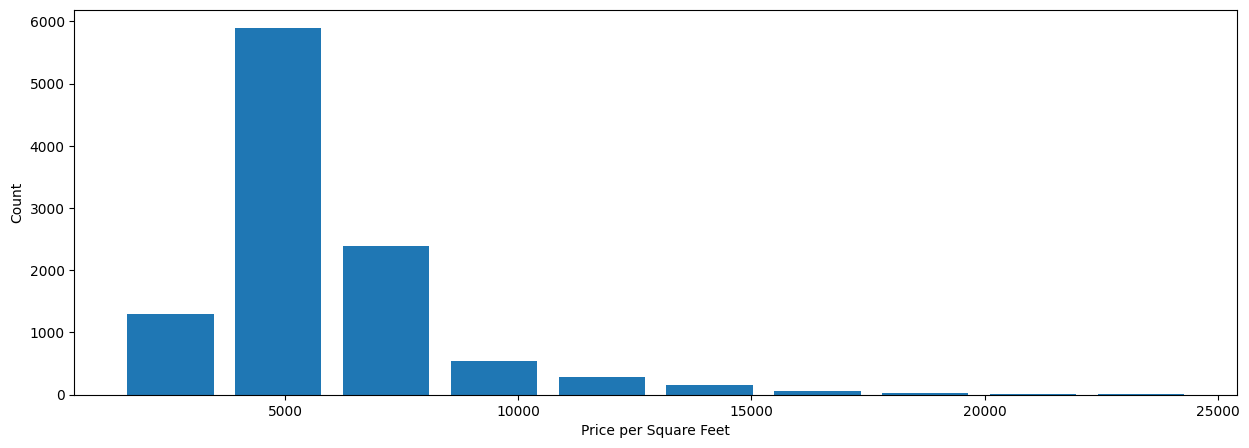

In [34]:
matplotlib.rcParams['figure.figsize'] = (15, 5)
plt.hist(df6['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [35]:
df6[df6.bath > df6.bedroom + 2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1590,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.0
1726,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.0
5436,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6429.0
6076,Other,6 BHK,11338.0,9.0,1000.0,6,8820.0
7381,Other,6 Bedroom,1200.0,9.0,122.0,6,10167.0
9382,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.0


In [36]:
df7 = df6[df6.bath < df6.bedroom + 2]
df7.shape

(10556, 7)

Remove size column as we have now bedrroms column and also remove price_per_sqft because we use this for finding outliers only

In [37]:
df8 = df7.drop(['size', 'price_per_sqft'], axis='columns')
df8

,location,total_sqft,bath,price,bedroom
0,Devarachikkanahalli,1250.0,2.0,44.00,3
1,Devarachikkanahalli,1250.0,2.0,40.00,2
2,Devarachikkanahalli,1200.0,2.0,83.00,2
3,Devarachikkanahalli,1170.0,2.0,40.00,2
4,Devarachikkanahalli,1425.0,2.0,65.00,3
...,...,...,...,...,...
10651,Yeshwanthpur,1676.0,3.0,92.13,3
10652,Yeshwanthpur,2503.0,3.0,138.00,3
10653,Yeshwanthpur,1855.0,3.0,135.00,3
10654,Yeshwanthpur,1876.0,3.0,160.00,3


<h2>Model Building</h2>

In [38]:
dummies = pd.get_dummies(df8.location)
df9 = pd.concat([df8, dummies.drop('Other', axis='columns')], axis='columns')
df9.head()

,location,total_sqft,bath,price,bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df10 = df9.drop('location', axis='columns')
df10.head()

,total_sqft,bath,price,bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df10.shape

(10556, 245)

In [41]:
X = df10.drop('price', axis='columns')
y = df10.price

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train.values, y_train.values)
lr_clf.score(X_test.values, y_test.values)

0.801856042809171

In [44]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.73197824, 0.71230943, 0.70469756, 0.78666706, 0.77820705])

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept' : [True, False],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.742772,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.618480,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.606570,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [46]:
def predict_price(location, sqft, bath, bedroom):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [47]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.53008614051767

In [48]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

78.94932464688067

In [49]:
predict_price('Indira Nagar', 1000, 3, 3)

176.6193906079186

In [50]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as json_file:
    json_file.write(json.dumps(columns))

In [51]:
import joblib

joblib.dump(lr_clf, "bangaluru_house_price_model")

['bangaluru_house_price_model']

In [52]:
df8.to_csv('price.csv')